In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
#here we have created X in a way such a way that it has 4 centres 

X,y = make_blobs(
     n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

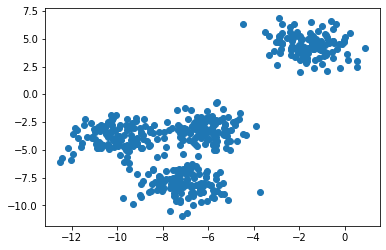

In [3]:
X=pd.DataFrame(X,columns=['one','two'])
plt.scatter(X.one,X.two)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


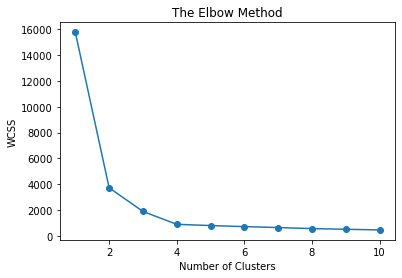

In [4]:
WCSS=[]
for i in range(1,11):
    k_means = KMeans( n_clusters=i)
    k_means.fit(X)
    WCSS.append(k_means.inertia_)

plt.plot(range(1,11),WCSS,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
## We will take K=4 by observing elbow graph

clusterer = KMeans(n_clusters=4,random_state=10)
labels = clusterer.fit_predict(X)
labels

array([2, 2, 3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 3, 3,
       0, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 3, 2, 3, 0, 3, 1, 0,
       0, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 1, 3, 0, 1, 0,
       2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 2, 3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 3, 1, 0, 0, 1, 1, 3,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 2, 1, 3,
       3, 3, 3, 2, 0, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 1, 3, 1,
       0, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 0, 3,
       2, 2, 2, 2, 0, 3, 2, 3, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 1, 3, 3,
       1, 0, 2, 2, 3, 3, 3, 0, 1, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 3, 3, 3, 0, 0, 3, 2, 1, 2, 2, 2, 0, 3,

In [6]:
silhouette_score(X,labels)

0.6505186632729437

In [7]:
#lets check what would have been the value of silhouette_score if we would have choosen some other K value
for i in range(3,10):
    clusterer = KMeans(n_clusters=i,random_state=10)
    labels = clusterer.fit_predict(X)
    print('When K={} then silhouette_score is :{}'.format(i,silhouette_score(X,labels)))
    

When K=3 then silhouette_score is :0.5882004012129721
When K=4 then silhouette_score is :0.6505186632729437
When K=5 then silhouette_score is :0.56376469026194
When K=6 then silhouette_score is :0.4504666294372765
When K=7 then silhouette_score is :0.39092211029930857
When K=8 then silhouette_score is :0.3314853899648912
When K=9 then silhouette_score is :0.3349898818697859


In [8]:
clusterer = KMeans(n_clusters=4,random_state=10)
labels = clusterer.fit_predict(X)
(silhouette_samples(X,labels)<0).sum()

1

In [9]:
for i in range(3,10):
    clusterer = KMeans(n_clusters=i,random_state=10)
    labels = clusterer.fit_predict(X)
    print('When K={} then no. of silhouette_samples <0 :{}'.format(i,(silhouette_samples(X,labels)<0).sum()))

When K=3 then no. of silhouette_samples <0 :5
When K=4 then no. of silhouette_samples <0 :1
When K=5 then no. of silhouette_samples <0 :4
When K=6 then no. of silhouette_samples <0 :8
When K=7 then no. of silhouette_samples <0 :8
When K=8 then no. of silhouette_samples <0 :2
When K=9 then no. of silhouette_samples <0 :3


### Hence, K=4 is a good choice

In [10]:
import seaborn as sns
clusterer = KMeans(n_clusters=4,random_state=10)
labels = clusterer.fit_predict(X)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='one', ylabel='two'>

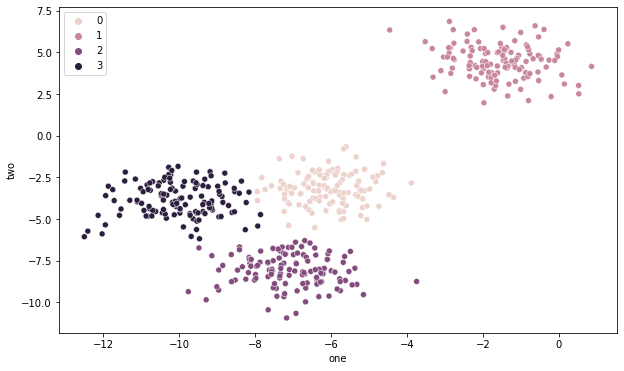

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(X['one'],X['two'],hue=labels)